# IT3385 MLOps Assignment 
<b>Business Objective:</b> You are tasked to train an ML model to predict patient cardiovascular health with essential data from the human body such as heart rate,ECG signal, cholesterol etc

<b>Dataset used:</b> 02 - Medical Records <br> 
<b>Target Variable:</b> Cardiovascular Issue (Yes/No) <br>
<b>Problem:</b>Classification

### Importing necessary libraries

In [1]:
import pycaret
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA - Exploratory Data Analysis 
EDA is used to analyse the data and discover trends, and patterns, or check assumptions in data with the help of statistical summaries and graphical representations.

<b>Basic Data Understanding: </b>
1. Columns and Data Types 
2. Unique count in each column 
3. Statistical description of continuous features 
4. Identifying null values - there are no missing values
5. Identifying duplicates - there are no duplicates

In [2]:
# reading in the dataset using pandas library 
df = pd.read_csv("02_medical_records.csv")
df

,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# Get column names and their counts
columns_list = df.columns.tolist()

#printing the columns within the dataframe and counting the number of columns 
print("Columns in the DataFrame:", len(columns_list))
print()
for idx, column in enumerate(columns_list, start=1):
    print(f"{idx}. {column}")

Columns in the DataFrame: 12

1. age
2. gender
3. chest_pain
4. resting_BP
5. cholesterol
6. fasting_BS
7. resting_ECG
8. max_HR
9. exercise_angina
10. old_peak
11. ST_slope
12. cv_issue


In [4]:
# printing out the non-null count and the datatype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   gender           918 non-null    object 
 2   chest_pain       918 non-null    object 
 3   resting_BP       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_BS       918 non-null    int64  
 6   resting_ECG      918 non-null    object 
 7   max_HR           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   old_peak         918 non-null    float64
 10  ST_slope         918 non-null    object 
 11  cv_issue         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# displaying the shape(rows, columns) respectively of the dataframe
print("Number of rows in the DataFrame:",df.shape[0])
print("Number of columns in the DataFrame:",df.shape[1])
df.shape

Number of rows in the DataFrame: 918
Number of columns in the DataFrame: 12


(918, 12)

In [6]:
# creating an empty dictionary to store the columns and the unique count for each column
dict = {}

# extracts the dataframe columns into the list and creates a for loop to go through each column in the list
for i in list(df.columns): 
    dict[i] = df[i].value_counts().shape[0]

# displays the unique count for each column
pd.DataFrame(dict, index = ["unique count"]).transpose()

,unique count
age,50
gender,2
chest_pain,4
resting_BP,67
cholesterol,222
fasting_BS,2
resting_ECG,3
max_HR,119
exercise_angina,2
old_peak,53


In [7]:
# displays the columns - separating them into categorical, continuous and target columns 
cat_cols =["gender", "chest_pain", "fasting_BS", "resting_ECG", "exercise_angina", "ST_slope"]
con_cols = ["age", "resting_BP", "cholesterol", "max_HR", "old_peak"] 
target_col = ["cv_issue"]

print("The categorial cols are :\n", cat_cols)
print("The continuous cols are :\n", con_cols)
print("The target variable is :", target_col)

The categorial cols are :
 ['gender', 'chest_pain', 'fasting_BS', 'resting_ECG', 'exercise_angina', 'ST_slope']
The continuous cols are :
 ['age', 'resting_BP', 'cholesterol', 'max_HR', 'old_peak']
The target variable is : ['cv_issue']


In [8]:
# displays the statistical description of the data in the dataframe
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
resting_BP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
max_HR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
old_peak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [9]:
# displays the missing values for each column in the dataframe
print("Number of missing values for every column:")
df.isnull().sum()

Number of missing values for every column:


age                0
gender             0
chest_pain         0
resting_BP         0
cholesterol        0
fasting_BS         0
resting_ECG        0
max_HR             0
exercise_angina    0
old_peak           0
ST_slope           0
cv_issue           0
dtype: int64

In [10]:
#displaying the number of duplicates in the dataframe 
duplicates = len(df) - len(df.drop_duplicates())
print(duplicates)

0


## EDA - Visualizations
With the use of variety of charts such as bar charts, box and whiskers plot, confusion matrix, it allows us to deduce information about the distribution within each column. Additionally, we are able to get possible correlations between the columns. 



<b>Pie Chart: Displaying the distribution of the target variable (cv_issue)</b><br>
From this pie chart, we can deduce that the distribution for the target variable is relatively quite balanced for both class 1 and 0, with a percentage of 55.3% and 44.7% respectively. 


Distribution of Individuals that have Cardiovascular Issues :
1    508
0    410
Name: cv_issue, dtype: int64


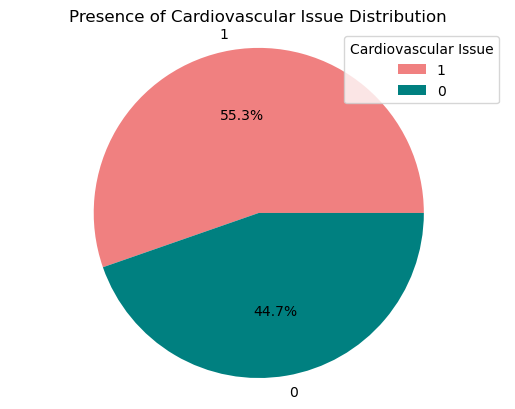

In [11]:
# calculates the count of each of the unique values
cv_issue_count = df["cv_issue"].value_counts()

# Plotting the pie chart
plt.pie(cv_issue_count, labels=cv_issue_count.index, autopct='%1.1f%%', colors = ['lightcoral', 'teal'])
plt.title("Presence of Cardiovascular Issue Distribution")
plt.axis('equal')

# Adding a legend
plt.legend(title="Cardiovascular Issue", loc="upper right")

print("Distribution of Individuals that have Cardiovascular Issues :")
print(cv_issue_count)
plt.show()

<b>Bar Charts: Displaying data understanding for categorical features. </b><br>


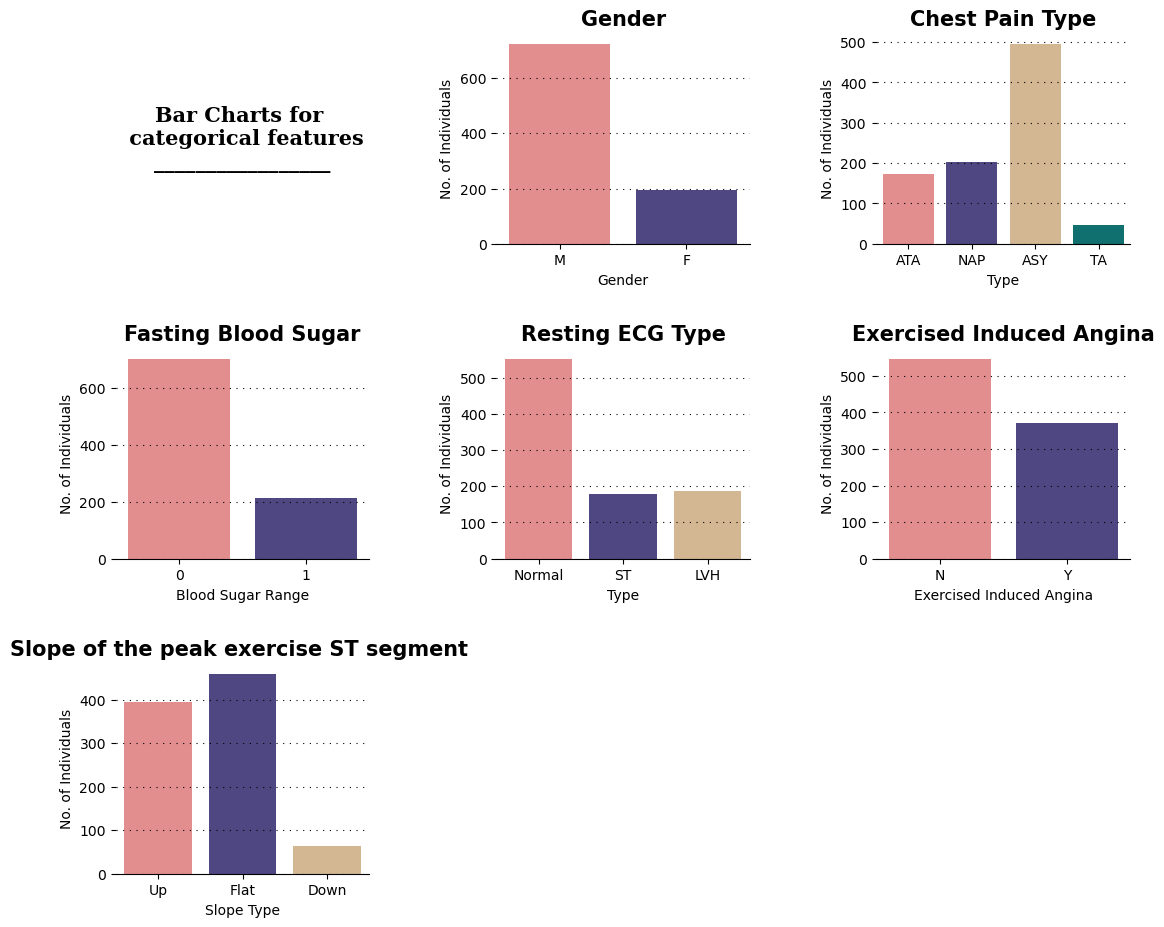

In [12]:
# depicting the arrangement of the graphs and (width, height) of the every graph
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(4,4)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

ax6 = fig.add_subplot(gs[2,0])


# depicting the colors of the graphs and the background color
background_color = "white"
color_palette = ["lightcoral","darkslateblue", "burlywood", "teal"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Bar Charts for \n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=15, fontweight='bold',
         fontfamily='serif')


# Gender Chart
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x="gender",palette=color_palette)
ax1.set_xlabel("Gender")
ax1.set_ylabel("No. of Individuals")
ax1.set_title("Gender", weight ='bold', size = 15)

# Chest Pain Chart
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x="chest_pain",palette=color_palette)
ax2.set_xlabel("Type")
ax2.set_ylabel("No. of Individuals")
ax2.set_title("Chest Pain Type", weight ='bold', size = 15)

# Fasting Blood Sugar Chart
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x="fasting_BS",palette=color_palette)
ax3.set_xlabel("Blood Sugar Range")
ax3.set_ylabel("No. of Individuals")
ax3.set_title("Fasting Blood Sugar", weight ='bold', size = 15)

# Resting electrocardiogram results Chart
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x="resting_ECG",palette=color_palette)
ax4.set_xlabel("Type")
ax4.set_ylabel("No. of Individuals")
ax4.set_title("Resting ECG Type", weight ='bold', size = 15)

# Exercise-induced angina Chart
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x="exercise_angina",palette=color_palette)
ax5.set_xlabel("Exercised Induced Angina")
ax5.set_ylabel("No. of Individuals")
ax5.set_title("Exercised Induced Angina", weight ='bold', size = 15)


# e slope of the peak exercise ST segment Chart
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x="ST_slope",palette=color_palette)
ax6.set_xlabel("Slope Type")
ax6.set_ylabel("No. of Individuals")
ax6.set_title("Slope of the peak exercise ST segment ", weight ='bold', size = 15)


# removing the grids around each of the graph
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False) 
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False) 
    ax6.spines[s].set_visible(False)


<b>Box & Whiskers Plot: displays data understanding for continuous features</b><br>

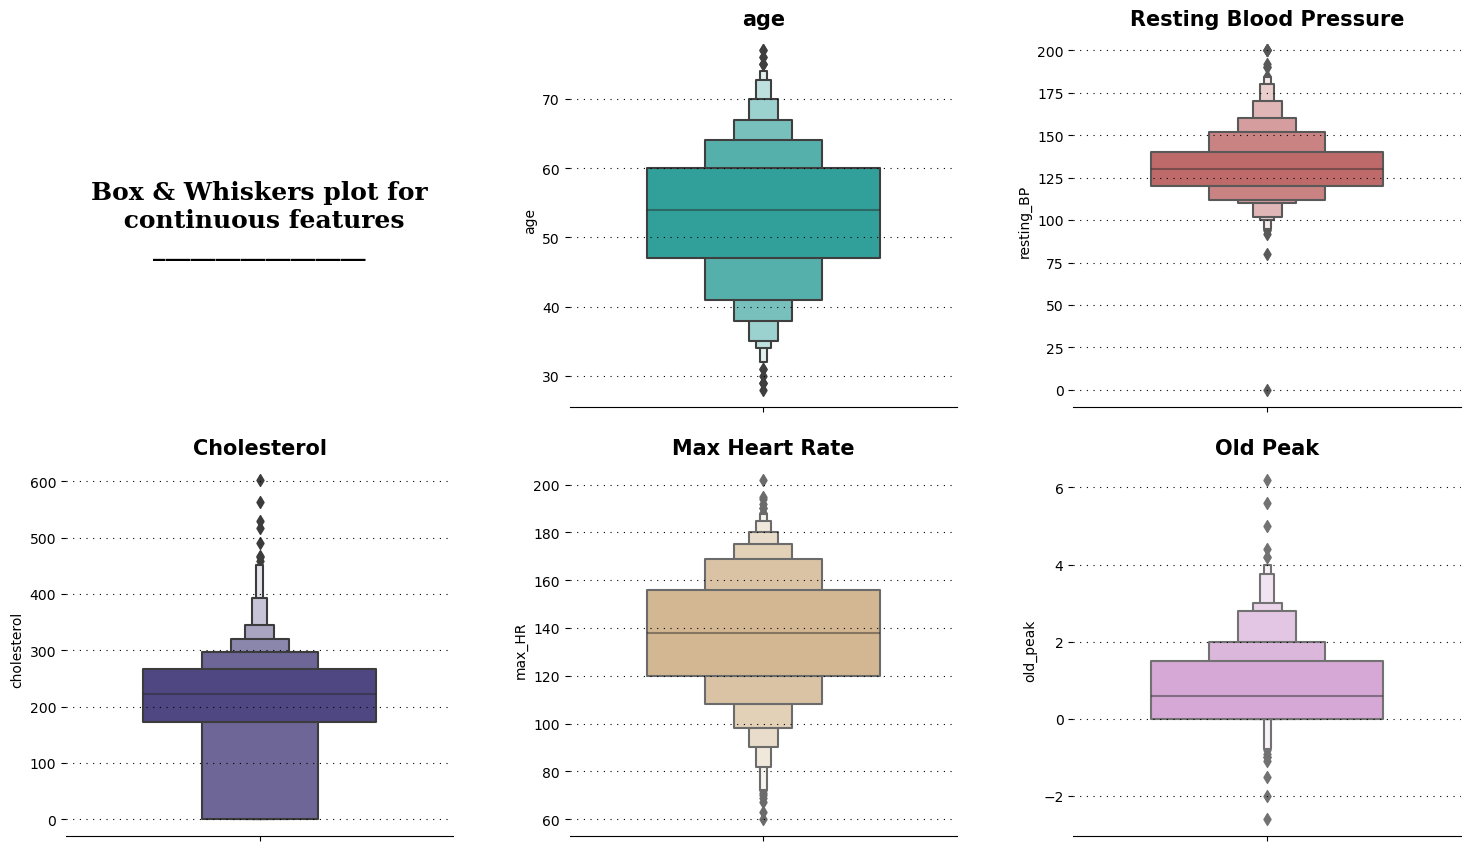

In [13]:
# depicting the arrangement of the graphs and (width, height) of the every graph
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


# depicting the colors of the graphs and the background color
background_color = "white"
color_palette = ["lightseagreen", "indianred", "darkslateblue", "burlywood", "plum"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box & Whiskers plot for\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


# Age Plot
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df["age"],palette=["lightseagreen"],width=0.6)
ax1.set_title("age", weight ='bold', size = 15)

# Resting Blood Pressure Plot
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df["resting_BP"],palette=["indianred"],width=0.6)
ax2.set_title("Resting Blood Pressure", weight ='bold', size = 15)

# Cholesterol Plot
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df["cholesterol"],palette=["darkslateblue"],width=0.6)
ax3.set_title("Cholesterol", weight ='bold', size = 15)

# Maximum Heart Rate Plot
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df["max_HR"],palette=["burlywood"],width=0.6)
ax4.set_title("Max Heart Rate", weight ='bold', size = 15)

# Old Peak Plot
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df["old_peak"],palette=["plum"],width=0.6)
ax5.set_title("Old Peak", weight ='bold', size = 15)

# removing the grids around each of the graph
for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)



<b>Correlation matrix: displays the correlation between the columns in the data</b><br>
According to the correlation matrix, we can derive that there is no multi-collinearity issue, which means that there are no columns that are highly correlated to each other. Therefore because of this, there aren't any columns that I removed during the data preparation phase as the removal of any columns would not affect the model performance. 

In [14]:
# displaying the correlation between each of the continuous features (in a table format)
df_corr = df[con_cols].corr().transpose()
df_corr

,age,resting_BP,cholesterol,max_HR,old_peak
age,1.000000,0.254399,-0.095282,-0.382045,0.258612
resting_BP,0.254399,1.000000,0.100893,-0.112135,0.164803
cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
max_HR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
old_peak,0.258612,0.164803,0.050148,-0.160691,1.000000


<AxesSubplot:>

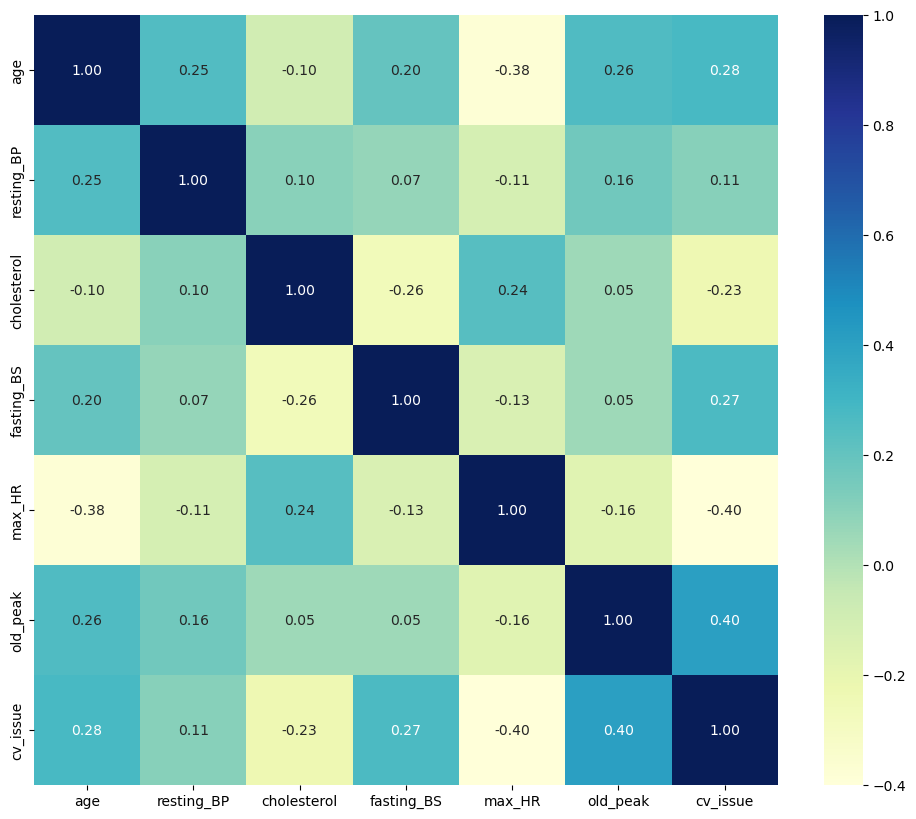

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

### Relationship and Correlation of columns with Target Variable
1. <b>Relationship between the age and the presence of the cardiovascular issue</b>
- We can deduce that more people in the higher age range has cardiovascular issues which makes sense because as age increases, the probability of health conditions becoming worst is higher too. 

2. <b>Relationship between the mean cholesterol and the presence of the cardiovascular issue </b>
- We can deduce that even with high cholesterol levels, individuals are also prone to getting cardiovascular issues. The distribution of people with these health issues are higher for those with lower cholesterols. 
    
3. <b>Relationship between the cardiovascular issues and both gender and exercised angina</b>

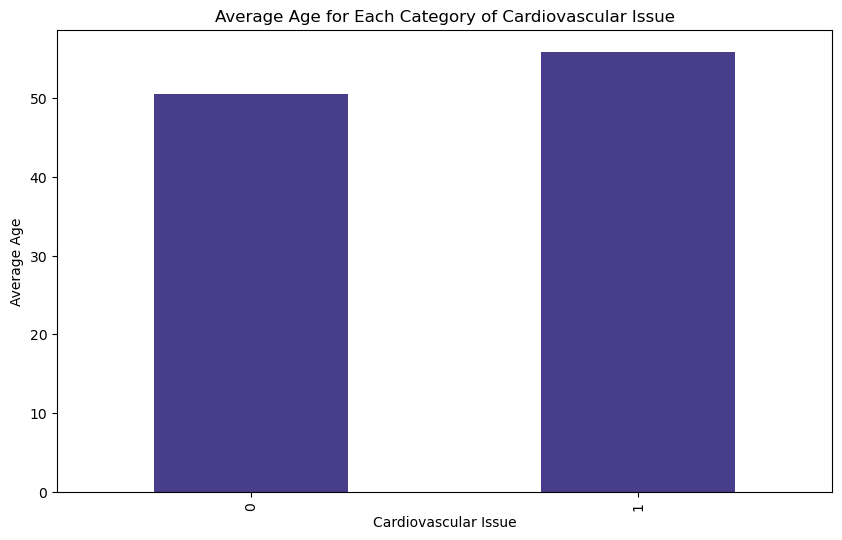

In [16]:
# Calculate average age for each cv_issue category
avg_age_by_issue = df.groupby('cv_issue')['age'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_age_by_issue.plot(kind='bar', color='darkslateblue')
plt.title('Average Age for Each Category of Cardiovascular Issue')
plt.xlabel('Cardiovascular Issue')
plt.ylabel('Average Age')


plt.show()

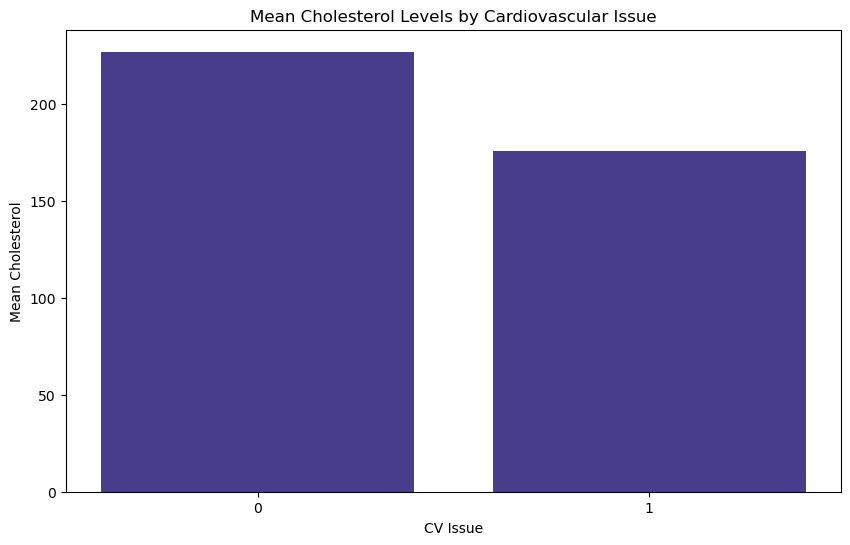

In [17]:
# getting the mean cholesterol based on the cv_issue
grouped_data = df.groupby("cv_issue")["cholesterol"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color="darkslateblue")
plt.xlabel("CV Issue")
plt.ylabel("Mean Cholesterol")
plt.title("Mean Cholesterol Levels by Cardiovascular Issue")
plt.xticks(grouped_data.index, ["0", "1"])

plt.show()

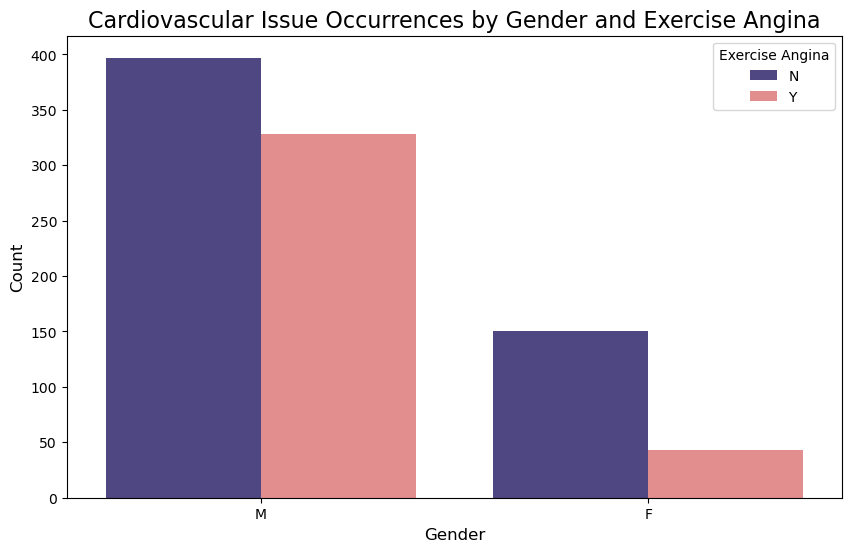

In [18]:
# Grouped bar chart
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='gender', hue='exercise_angina', palette=['darkslateblue', 'lightcoral'])

plt.title('Cardiovascular Issue Occurrences by Gender and Exercise Angina', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Exercise Angina', title_fontsize=10)

plt.show()

## Data Preparation - Using Pycaret
This process includes preprocessing tasks that I have configured such as:
- normalizing  
- transformation  
- removal of outliers
- defining training set

In [3]:
# splitting the model into two types of sets - data used for training and unseen data for testing (95%:5%)
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
unseen_data = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(unseen_data.shape))

Data for Modeling: (872, 12)
Unseen Data For Predictions: (46, 12)


In [4]:
# setting up the configurations and the steps for data preparation of the dataset 
from pycaret.classification import * 
cv = setup(data=df, target = 'cv_issue', 
           session_id = 123,
           remove_outliers=True,
           normalize = True,
           transformation = True,  
           train_size = 0.8
          )

,Description,Value
0,Session id,123
1,Target,cv_issue
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(881, 19)"
5,Transformed train set shape,"(697, 19)"
6,Transformed test set shape,"(184, 19)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [21]:
# applying those changes and configurations (data processing steps)
cv.get_config('dataset_transformed')

,age,gender,chest_pain_ASY,chest_pain_ATA,chest_pain_NAP,chest_pain_TA,resting_BP,cholesterol,fasting_BS,resting_ECG_Normal,resting_ECG_ST,resting_ECG_LVH,max_HR,exercise_angina,old_peak,ST_slope_Flat,ST_slope_Up,ST_slope_Down,cv_issue
774,1.390871,-1.976980,0.897608,-0.487863,-0.532550,-0.184729,2.689404,0.332608,1.959663,0.773708,-0.465193,-0.494614,1.100137,1.195229,0.303175,0.953724,-0.866750,-0.222932,1
435,0.723647,0.505822,0.897608,-0.487863,-0.532550,-0.184729,1.143027,-1.935553,-0.510292,-1.292477,2.149644,-0.494614,-0.765390,1.195229,-0.848593,-1.048522,1.153735,-0.222932,0
904,0.286866,0.505822,-1.114073,2.049754,-0.532550,-0.184729,-0.683633,0.422172,-0.510292,0.773708,-0.465193,-0.494614,1.264869,-0.836660,-0.848593,-1.048522,-0.866750,4.485667,0
469,0.286866,0.505822,-1.114073,2.049754,-0.532550,-0.184729,-0.460394,0.302489,1.959663,0.773708,-0.465193,-0.494614,0.936274,-0.836660,1.133556,0.953724,-0.866750,-0.222932,0
514,-1.083344,0.505822,0.897608,-0.487863,-0.532550,-0.184729,-0.572206,-1.935553,-0.510292,0.773708,-0.465193,-0.494614,-0.688882,-0.836660,-0.212301,-1.048522,1.153735,-0.222932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-1.387676,0.505822,0.897608,-0.487863,-0.532550,-0.184729,-2.041634,-1.935553,1.959663,-1.292477,2.149644,-0.494614,0.249941,-0.836660,-0.848593,-1.048522,1.153735,-0.222932,1
629,0.395436,-1.976980,0.897608,-0.487863,-0.532550,-0.184729,-0.235630,0.875293,-0.510292,-1.292477,-0.465193,2.021779,0.854673,-0.836660,-0.848593,-1.048522,1.153735,-0.222932,0
810,0.178724,-1.976980,-1.114073,2.049754,-0.532550,-0.184729,0.161266,0.495944,-0.510292,-1.292477,-0.465193,2.021779,0.936274,-0.836660,0.660613,0.953724,-0.866750,-0.222932,0
306,0.178724,0.505822,0.897608,-0.487863,-0.532550,-0.184729,-0.960475,-1.935553,1.959663,0.773708,-0.465193,-0.494614,0.692143,-0.836660,-0.707807,0.953724,-0.866750,-0.222932,1


## Comparing the Models
In this step, we are able to get our best model by looking at the table below which shows us each model and its accuracy, AUC, Recall and etc. 
Additionally, we are able to tune the hyperparameters of our best model. 

As we can see from the table of model performances below, we can derive that the best model is the <b>Random Forest Classifier</b>. However, when doing task 2 of the assignment, the <b>Random Forest Classifier</b> is not compatible with the scikit-learn version when placing it into the web application. Therefore, I took the <b>second best model</b> which is the <b>Extra Trees Classifier</b>, with model performance scores that are relatively good as well. 

In [5]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8733,0.9276,0.9163,0.8665,0.8895,0.7412,0.7456,0.9650
rf,Random Forest Classifier,0.8720,0.9277,0.9090,0.8697,0.8878,0.7387,0.7423,1.1740
et,Extra Trees Classifier,0.8692,0.9211,0.8966,0.8749,0.8842,0.7337,0.7372,1.0200
ridge,Ridge Classifier,0.8638,0.0000,0.9040,0.8589,0.8804,0.7223,0.7248,1.5830
lda,Linear Discriminant Analysis,0.8638,0.9199,0.9040,0.8589,0.8804,0.7223,0.7248,1.0390
lr,Logistic Regression,0.8583,0.9201,0.8941,0.8578,0.8747,0.7116,0.7143,1.3940
gbc,Gradient Boosting Classifier,0.8583,0.9221,0.8893,0.8622,0.8749,0.7114,0.7131,1.7300
lightgbm,Light Gradient Boosting Machine,0.8570,0.9200,0.8918,0.8590,0.8739,0.7087,0.7120,2.5280
knn,K Neighbors Classifier,0.8541,0.8982,0.8965,0.8520,0.8724,0.7023,0.7064,0.8190
nb,Naive Bayes,0.8460,0.9031,0.8646,0.8621,0.8621,0.6873,0.6898,2.1210


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## Creating the Extra Trees Classifier - Model 1 
In this section, we will do K-Fold cross validation with 3 folds and in return, get the mean as well as the standard deviation. 
Additionally, I have also tuned some hyperparameters (max_depth and max_features) in order to see the best configurations for the best model in an attempt to improve the model.

In [6]:
# the number of folds defines the number of folds in which to split a given dataset
et_model = create_model('et', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8653,0.9256,0.8971,0.8652,0.8809,0.7261,0.7267
1,0.8408,0.9078,0.8815,0.8380,0.8592,0.6764,0.6775
2,0.8934,0.9311,0.9259,0.8865,0.9058,0.7833,0.7843
Mean,0.8665,0.9215,0.9015,0.8633,0.8820,0.7286,0.7295
Std,0.0215,0.0100,0.0184,0.0198,0.0190,0.0437,0.0436


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
# finding the parameters for the model - to see what parameters can be tuned
et_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

### Hyper-parameter tuning of the Extra Trees Classifier
Due to the many parameters that can be tuned, I have chosen two of the parameters to tune for these reasons: 
1. max_depth: The maximum depth of the tree
2. max_features: The number of features to consider when looking for the best split

In [7]:
# define tuning grid
et_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12],
          'max_features': ['auto', 'sqrt', 'log2', 2, 5, 8, 13, 21, 34, None]}

# tune model with custom grid and metric = AUC
tuned_et_model = tune_model(et_model, custom_grid = et_grid, optimize = 'AUC', fold =3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8694,0.9218,0.9191,0.8562,0.8865,0.7331,0.7357
1,0.8612,0.9238,0.9037,0.8531,0.8777,0.7176,0.7192
2,0.8811,0.9301,0.9185,0.8732,0.8953,0.7581,0.7594
Mean,0.8706,0.9252,0.9138,0.8609,0.8865,0.7363,0.7381
Std,0.0082,0.0036,0.0071,0.0088,0.0072,0.0167,0.0165


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [8]:
#seeing the final extra trees classifier tuned model 
tuned_et_model 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=6, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Comparing the model with and without hyper-parameters tuned
When comparing both models with and without hyper-parameters tuned, we can derive that the model's performance improved after tuning some of the hyper-parameters. (though it only improved ever so slightly)

## Analysing the Best Tuned Extra Trees Classifier
In this step, we are able to use comprehensive performance metrics for the model evaluation and see the performance of the model.

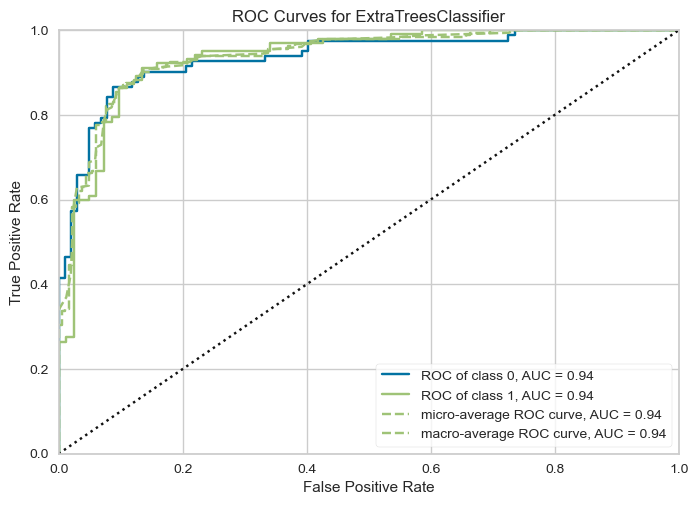

In [27]:
plot_model(tuned_et_model, plot ='auc')

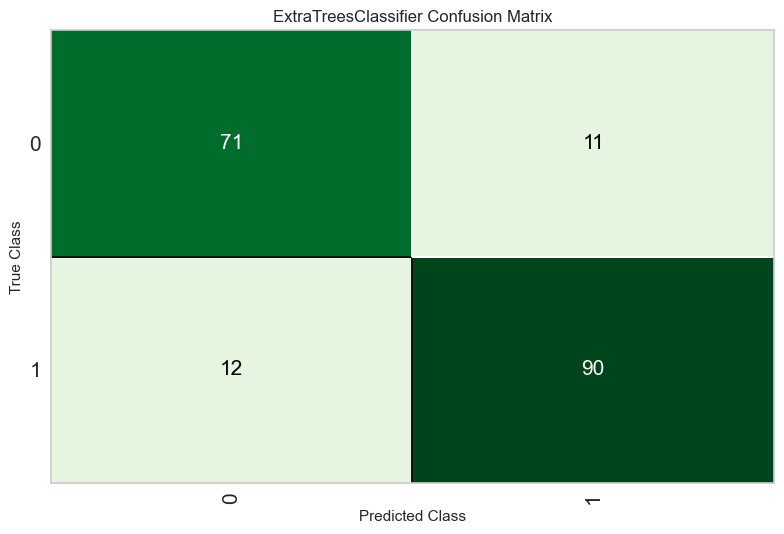

In [28]:
plot_model(tuned_et_model, plot = 'confusion_matrix')

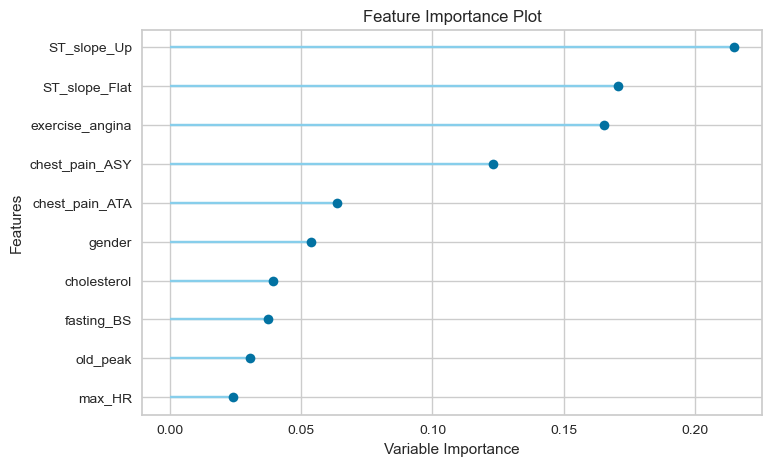

In [29]:
plot_model(tuned_et_model, plot ='feature')

In [30]:
evaluate_model(tuned_et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

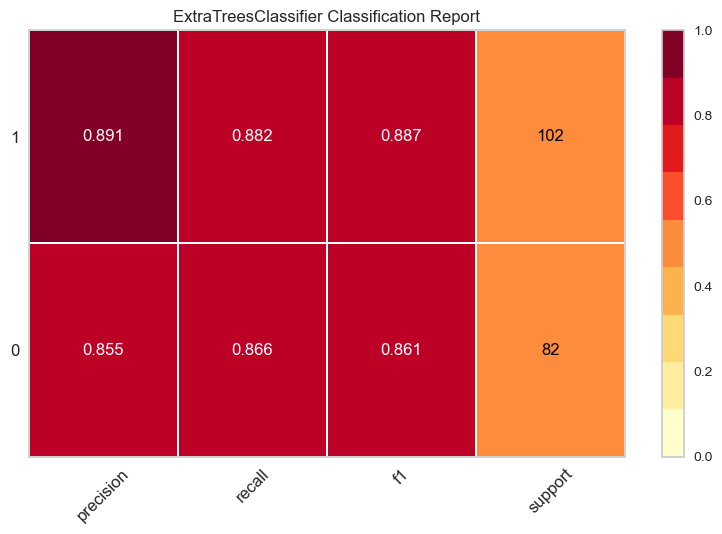

In [31]:
plot_model(tuned_et_model, plot = 'class_report')

In [32]:
predict_model(tuned_et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8750,0.9357,0.8824,0.8911,0.8867,0.7473,0.7474


,age,gender,chest_pain,resting_BP,cholesterol,fasting_BS,resting_ECG,max_HR,exercise_angina,old_peak,ST_slope,cv_issue,prediction_label,prediction_score
862,65,F,NAP,155,269,0,Normal,148,N,0.8,Up,0,0,0.9593
161,49,M,ASY,128,212,0,Normal,96,Y,0.0,Flat,1,1,0.9238
872,55,M,ASY,132,353,0,Normal,132,Y,1.2,Flat,1,1,0.9142
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0,0,0.9686
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1,1,0.9523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,40,M,ASY,95,0,1,ST,144,N,0.0,Up,1,1,0.6920
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up,0,0,0.6253
810,55,F,ATA,135,250,0,LVH,161,N,1.4,Flat,0,0,0.7668
306,55,M,ASY,115,0,1,Normal,155,N,0.1,Flat,1,1,0.9472


In [33]:
new_prediction = predict_model(tuned_et_model, data=unseen_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8043,0.8800,0.7600,0.8636,0.8085,0.6102,0.6154


## Saving and Loading the Model

In [9]:
# save model
save_model(et_model, '201423L_MLOps_Final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'resting_BP', 'cholesterol',
                                              'fasting_BS', 'max_HR',
                                              'old_peak'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verb...
                  ExtraTreesClassifier(bootstrap=False, cc

In [35]:
# load model
loaded_from_disk = load_model('201423L_MLOps_Final')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\NICOLE~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'resting_BP', 'cholesterol',
                                             'fasting_BS', 'max_HR',
                                             'old_peak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose=0))),
                ('categorical...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_wei

In [36]:
new_prediction_et = predict_model(loaded_from_disk, data=unseen_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8696,0.9905,0.7600,1.0000,0.8636,0.7430,0.7688
